In [1]:
# Dependencies, files etc.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

netfile = 'raw/InternetUsers.csv'
happyfile = 'raw/WorldHappiness.csv'

# Read files and store in dataframes
userdata = pd.read_csv(netfile)
happydata = pd.read_csv(happyfile)

In [2]:
# Inspect the internet users data first.
userdata.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [3]:
# Look at unique values in the country field.
print(userdata['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Asia and Pacific' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe and Central Asia' 'European Union' 'Faeroe Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Gr

In [4]:
# Drop data for years prior to 2005, since the World Happiness data starts with 2005.
users_present = userdata[userdata['Year'] >= 2005]
users_present.head(15)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
25,25,Afghanistan,AFG,2005,4.677583,1.224148,298829,0.000858
26,26,Afghanistan,AFG,2006,9.534904,2.107124,536114,0.001892
27,27,Afghanistan,AFG,2007,17.225105,1.900000,492163,0.001845
28,28,Afghanistan,AFG,2008,28.493004,1.840000,486261,0.001804
29,29,Afghanistan,AFG,2009,36.978584,3.550000,972178,0.003522
30,30,Afghanistan,AFG,2010,35.003128,4.000000,1127587,0.005140
31,31,Afghanistan,AFG,2011,45.813625,5.000000,1462458,0.000000
32,32,Afghanistan,AFG,2012,49.227978,5.454545,1661808,0.004814
33,33,Afghanistan,AFG,2013,52.083576,5.900000,1860932,0.004648
34,34,Afghanistan,AFG,2014,55.159515,7.000000,2290135,0.004495


In [5]:
# Create a separate dataframe for the income rows, since we will treat the income groups separate from the country groups.
users_byincome = users_present.loc[users_present['Entity'].str.contains('income')]
print(users_byincome)

      Unnamed: 0               Entity    Code  Year  Cellular Subscription  \
3471        3471          High income  Region  2005              83.760674   
3472        3472          High income  Region  2006              91.438065   
3473        3473          High income  Region  2007              99.766846   
3474        3474          High income  Region  2008             104.228630   
3475        3475          High income  Region  2009             107.192009   
...          ...                  ...     ...   ...                    ...   
8493        8493  Upper middle income  Region  2016             108.022812   
8494        8494  Upper middle income  Region  2017             111.202080   
8495        8495  Upper middle income  Region  2018             118.140427   
8496        8496  Upper middle income  Region  2019             121.667953   
8497        8497  Upper middle income  Region  2020             119.429337   

      Internet Users(%)  No. of Internet Users  Broadband Subsc

In [6]:
# Create a dataframe for the users by country, removing any containing 'income'
users_bycountry = users_present.loc[users_present['Entity'].str.contains('income') == False]
print(users_bycountry)

      Unnamed: 0       Entity Code  Year  Cellular Subscription  \
25            25  Afghanistan  AFG  2005               4.677583   
26            26  Afghanistan  AFG  2006               9.534904   
27            27  Afghanistan  AFG  2007              17.225105   
28            28  Afghanistan  AFG  2008              28.493004   
29            29  Afghanistan  AFG  2009              36.978584   
...          ...          ...  ...   ...                    ...   
8862        8862     Zimbabwe  ZWE  2016              91.793457   
8863        8863     Zimbabwe  ZWE  2017              98.985077   
8864        8864     Zimbabwe  ZWE  2018              89.404869   
8865        8865     Zimbabwe  ZWE  2019              90.102287   
8866        8866     Zimbabwe  ZWE  2020              88.755806   

      Internet Users(%)  No. of Internet Users  Broadband Subscription  
25             1.224148                 298829                0.000858  
26             2.107124                 536114   

In [7]:
# Create a dataframe for users by the remaining regions, now that income groups have been removed
users_byregion = users_bycountry.loc[users_bycountry['Code'] == 'Region']
print(users_byregion)

      Unnamed: 0                 Entity    Code  Year  Cellular Subscription  \
2224        2224  East Asia and Pacific  Region  2005              33.835049   
2225        2225  East Asia and Pacific  Region  2006              39.216740   
2226        2226  East Asia and Pacific  Region  2007              47.739178   
2227        2227  East Asia and Pacific  Region  2008              56.768711   
2228        2228  East Asia and Pacific  Region  2009              64.591988   
...          ...                    ...     ...   ...                    ...   
7579        7579     Sub-Saharan Africa  Region  2016              73.581993   
7580        7580     Sub-Saharan Africa  Region  2017              72.867790   
7581        7581     Sub-Saharan Africa  Region  2018              82.197639   
7582        7582     Sub-Saharan Africa  Region  2019              79.651482   
7583        7583     Sub-Saharan Africa  Region  2020              83.087425   

      Internet Users(%)  No. of Interne

In [9]:
# Look at unique values in the regions.
print(users_byregion['Entity'].unique())

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'North America' 'South Asia' 'Sub-Saharan Africa']


In [10]:
# Drop the regions from the country dataframe
indexregions = users_bycountry[users_bycountry['Code'] == 'Region'].index
users_bycountry.drop(indexregions, inplace = True)
print(users_bycountry)

      Unnamed: 0       Entity Code  Year  Cellular Subscription  \
25            25  Afghanistan  AFG  2005               4.677583   
26            26  Afghanistan  AFG  2006               9.534904   
27            27  Afghanistan  AFG  2007              17.225105   
28            28  Afghanistan  AFG  2008              28.493004   
29            29  Afghanistan  AFG  2009              36.978584   
...          ...          ...  ...   ...                    ...   
8862        8862     Zimbabwe  ZWE  2016              91.793457   
8863        8863     Zimbabwe  ZWE  2017              98.985077   
8864        8864     Zimbabwe  ZWE  2018              89.404869   
8865        8865     Zimbabwe  ZWE  2019              90.102287   
8866        8866     Zimbabwe  ZWE  2020              88.755806   

      Internet Users(%)  No. of Internet Users  Broadband Subscription  
25             1.224148                 298829                0.000858  
26             2.107124                 536114   

C:\Users\ennef\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# Look at unique values in the countries to ensure we've removed all regions and incomes.
internetusers_countries = users_bycountry['Entity'].unique()
print(users_bycountry['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faeroe Islands' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong'


In [12]:
# Look at the happiness report data
happydata.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [13]:
# Compare the two datasets' region identifiers
print(happydata['Regional Indicator'].unique())
print(users_byregion['Entity'].unique())

['South Asia' 'Central and Eastern Europe' 'Middle East and North Africa'
 nan 'Latin America and Caribbean' 'Commonwealth of Independent States'
 'North America and ANZ' 'Western Europe' 'Sub-Saharan Africa'
 'Southeast Asia' 'East Asia']
['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'North America' 'South Asia' 'Sub-Saharan Africa']


In [13]:
# Unfortunately, the regions do not align between the two datasets. We will match by country.

In [14]:
# Drop 2021 and 2022 from Happiness Report data
happy_present = happydata.loc[happydata['Year'] <= 2020]
print(happy_present)

     Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2192     Zimbabwe  Sub-Saharan Africa  2016     3.735400            7.734831   
2193     Zimbabwe  Sub-Saharan Africa  2017     3.638300            7.754387   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   

      Social Support  Healthy Life Expe

In [15]:
print(happy_present['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

In [16]:
# Ensure we have the same list of countries in both datasets

In [16]:
happy_countries = happy_present['Country Name'].unique()
internetusers_countries
# unique_countries = pd.concat(happy_countries, internetusers_countries).drop_duplicates(keep = False)
unique_countries = list(set(happy_countries).symmetric_difference(set(internetusers_countries)))
print(unique_countries)

['Tonga', 'Bahamas', 'Greenland', 'Aruba', 'Barbados', 'Micronesia (country)', 'British Virgin Islands', 'Congo (Brazzaville)', 'Curacao', 'Antigua and Barbuda', 'Liechtenstein', 'Congo (Kinshasa)', 'North Korea', 'Eritrea', 'Andorra', 'World', 'Hong Kong', 'Taiwan Province of China', 'Turkey', 'United States Virgin Islands', 'Ivory Coast', 'Democratic Republic of Congo', 'Macao', 'Nauru', 'Hong Kong S.A.R. of China', 'Sint Maarten (Dutch part)', 'Kiribati', 'New Caledonia', 'Congo', 'Saint Lucia', 'Cape Verde', 'Samoa', 'Marshall Islands', 'Palau', 'Monaco', 'Cayman Islands', 'Puerto Rico', 'Tuvalu', 'San Marino', 'Dominica', 'Somaliland region', 'Fiji', "Cote d'Ivoire", 'Seychelles', 'Saint Kitts and Nevis', 'Faeroe Islands', 'Turkiye', 'Brunei', 'Timor', 'Solomon Islands', 'French Polynesia', 'Papua New Guinea', 'Gibraltar', 'State of Palestine', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Vanuatu', 'Guinea-Bissau', 'Grenada', 'Bermuda', 'Palestine', 'Equatorial Gu

In [17]:
# The above is a list of countries that do not exist in both datasets.
# We can drop this from the internet users data for consistency.
final_usersdata = users_bycountry[~users_bycountry['Entity'].isin(unique_countries)]
print(final_usersdata['Entity'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius'
 'Mexico' 'Moldova' 'Mon

In [18]:
# Next, let's drop from a version of the happiness data for comparison to the internet data
final_happydata = happy_present[~happy_present['Country Name'].isin(unique_countries)]
print(final_happydata['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius'
 'Mexico' 'Moldova' 'Mon

## The data is ready! Let's look at some statistics.

In [19]:
users_countries = final_usersdata.groupby('Entity')
users_income = users_byincome.groupby('Entity')
users_years = final_usersdata.groupby('Year')

num_users_sum = users_years['No. of Internet Users'].sum()
# num_users_sum

income_mean_percent = users_income['Internet Users(%)'].mean()
income_mean_percent

Entity
High income              76.137081
Low and middle income    27.044517
Low income                7.644279
Lower middle income      17.635725
Middle income            28.849739
Upper middle income      42.771391
Name: Internet Users(%), dtype: float64

Text(0.5, 0, 'Year')

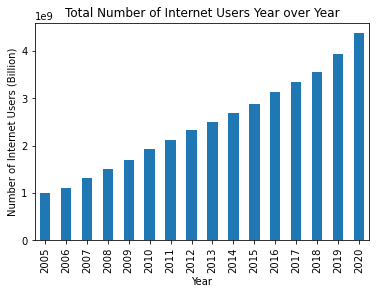

In [20]:
num_users_sum.plot(kind = 'bar', title = 'Total Number of Internet Users Year over Year')
plt.ylabel('Number of Internet Users (Billion)')
plt.xlabel('Year')

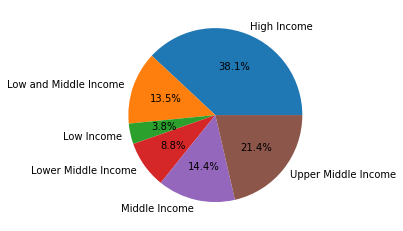

In [21]:
labels = ['High Income', 'Low and Middle Income', 'Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income']
income_pie = plt.pie(income_mean_percent, labels = labels, autopct = '%1.1f%%')

### There are too many unknowns about the data to use the above pie chart.
Definitions from the Kaggle dataset:
- Internet Users(%) - The share of the population that is accessing the internet for all countries of the world.
- No. of Internet Users - Number of people using the Internet in every country.

Notes/questions:  
- No. of users is 0 for all the incomes (because the incomes span multiple countries, that makes sense).
- So, is % of users the share of the population within the income brackets?
    - For example, on average across all years, 76% of all high income people have internet access?
    - In that case, this maybe would be best described with a bar chart.
- Is 'Low and Middle Income' a combination of Low, Lower Middle, and Middle?
    - If the above assumption is true, why was this included? Seems to duplicate information unnecessarily.

In [22]:
users_countries['No. of Internet Users'].max().sort_values()

Entity
Kosovo                    0
Comoros               64576
Belize               197664
Guyana               284895
Somalia              297886
                    ...    
Indonesia         146059763
Brazil            173419624
United States     305371298
India             600446441
China            1003218650
Name: No. of Internet Users, Length: 157, dtype: int64

In [23]:
group_users_countries = final_usersdata.groupby(['Year', 'Entity'])['No. of Internet Users'].sum()
group_users_countries = group_users_countries.unstack(level = 'Entity')
group_users_countries.columns.name = 'Number of Internet Users'
group_users_countries.head()

Number of Internet Users,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2005,298829.0,183289.0,1925970.0,222396.0,6923521.0,160072.0,12708191.0,4771680.0,695129.0,192144.0,...,1712398.0,42268618.0,201758182.0,666459.0,888485.0,3347733.0,10592244.0,223568.0,150343.0,293394.0
2006,536114.0,288626.0,2466167.0,302435.0,8261401.0,170445.0,13508241.0,5258302.0,1050917.0,274245.0,...,2547457.0,41845106.0,206623372.0,976751.0,1720172.0,4126214.0,14485516.0,274101.0,191545.0,295932.0
2007,492163.0,447488.0,3211877.0,355465.0,10346509.0,180902.0,14467012.0,5754047.0,1290921.0,342443.0,...,3582310.0,46000642.0,227057544.0,1131740.0,2045656.0,5733477.0,17592787.0,1134341.0,235639.0,373517.0
2008,486261.0,704273.0,3519185.0,412139.0,11322013.0,185271.0,15228352.0,6063611.0,1537148.0,576828.0,...,4402873.0,48399673.0,226214235.0,1311099.0,2517627.0,7229277.0,20474858.0,1607369.0,282765.0,439262.0
2009,972178.0,1207388.0,3952515.0,517676.0,13832677.0,453538.0,16083217.0,6127888.0,2498779.0,625114.0,...,5115301.0,52010570.0,219043543.0,1397859.0,3351973.0,9263222.0,22961215.0,2393348.0,332952.0,507192.0


In [ ]:
# Export the above dataframe to json
group_users_countries.to_json(r'json/users_by_country_yoy.json')

In [24]:
# Export the dataframe to csv
group_users_countries.to_json(r'json/import_files/users_by_country_yoy.csv')

In [26]:
# Alternate version of the above - pivot table
user_countries_pivot = final_usersdata.pivot(index = 'Year', columns = 'Entity', values = 'No. of Internet Users')
print(user_countries_pivot)

Entity  Afghanistan    Albania     Algeria      Angola   Argentina    Armenia  \
Year                                                                            
2005       298829.0   183289.0   1925970.0    222396.0   6923521.0   160072.0   
2006       536114.0   288626.0   2466167.0    302435.0   8261401.0   170445.0   
2007       492163.0   447488.0   3211877.0    355465.0  10346509.0   180902.0   
2008       486261.0   704273.0   3519185.0    412139.0  11322013.0   185271.0   
2009       972178.0  1207388.0   3952515.0    517676.0  13832677.0   453538.0   
2010      1127587.0  1311031.0   4482044.0    654197.0  18495056.0   736574.0   
2011      1462458.0  1363310.0   5444989.0   1140179.0  21175575.0   937275.0   
2012      1661808.0  1428742.0   6781424.0   1939499.0  23409419.0  1092910.0   
2013      1860932.0  1495476.0   8550141.0   3399112.0  25390573.0  1215681.0   
2014      2290135.0  1566066.0  11434250.0   5805465.0  27707168.0  1578565.0   
2015      2788039.0  1640132

NameError: name 'ax' is not defined

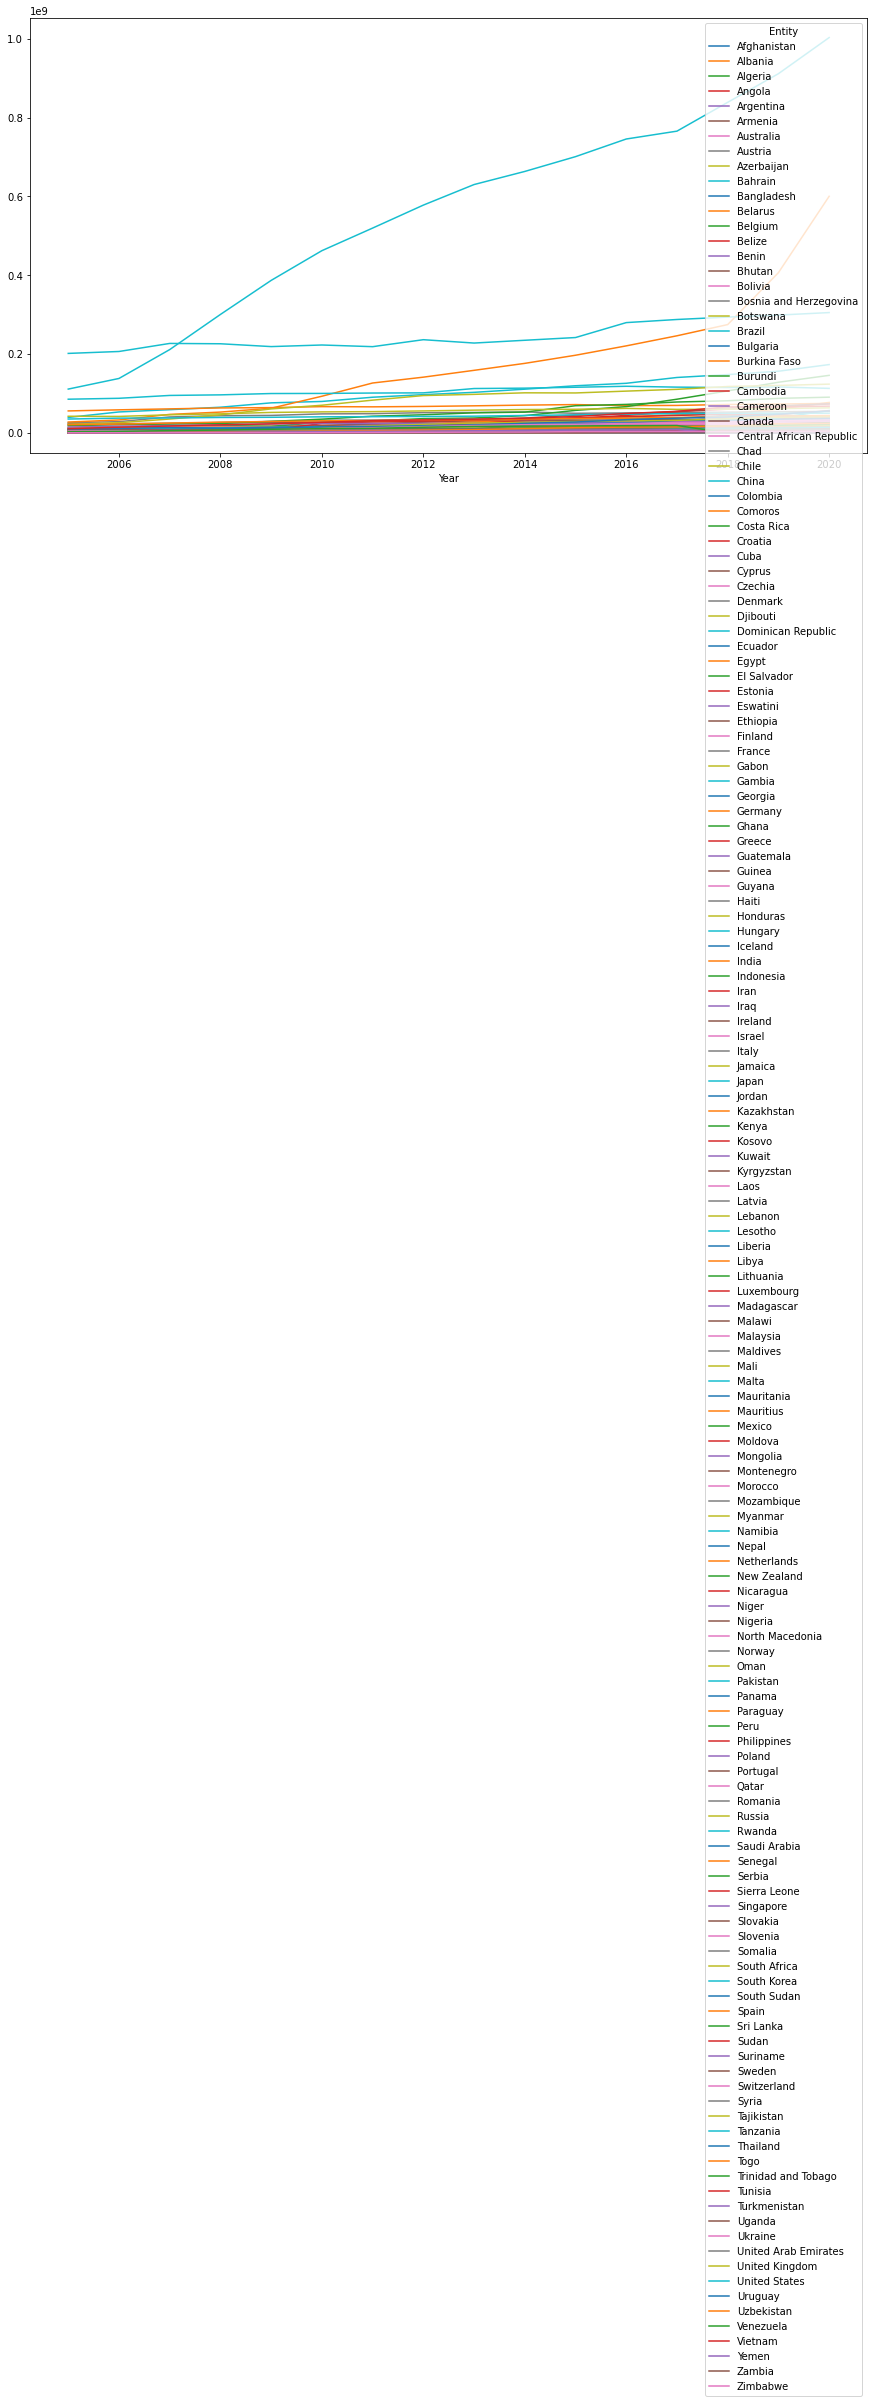

In [27]:
# Function to format the numbers in the axis ticks
## Formatter is not working here...
def format_number(val, indx):
    if val >= 1000000:
#         newval = '{:1.1f}M'.format(val*0.000001)
        newval = '%1.1fM' % (val*1e-6)
    else:
        newval = '{:1.0f}K'.format(val*0.001)
    return newval
formatter = FuncFormatter(format_number)

user_countries_pivot.plot(kind = 'line', figsize=(15,8))
ax.yaxis.set_major_formatter(formatter)
plt.yticks(np.arange(0, 1003218651, 50000000))

plt.title('Internet Users by Country YoY')
plt.show()

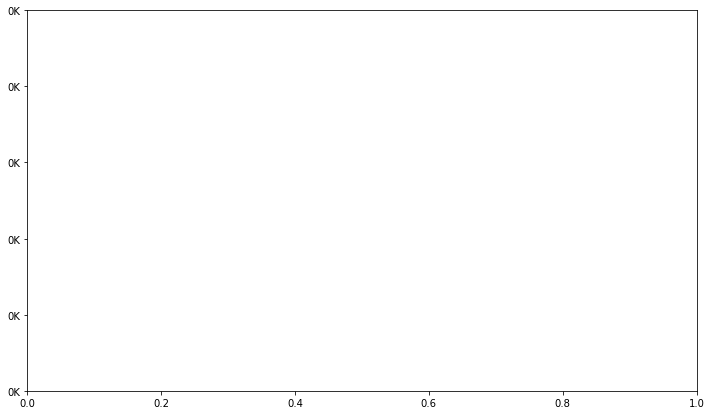

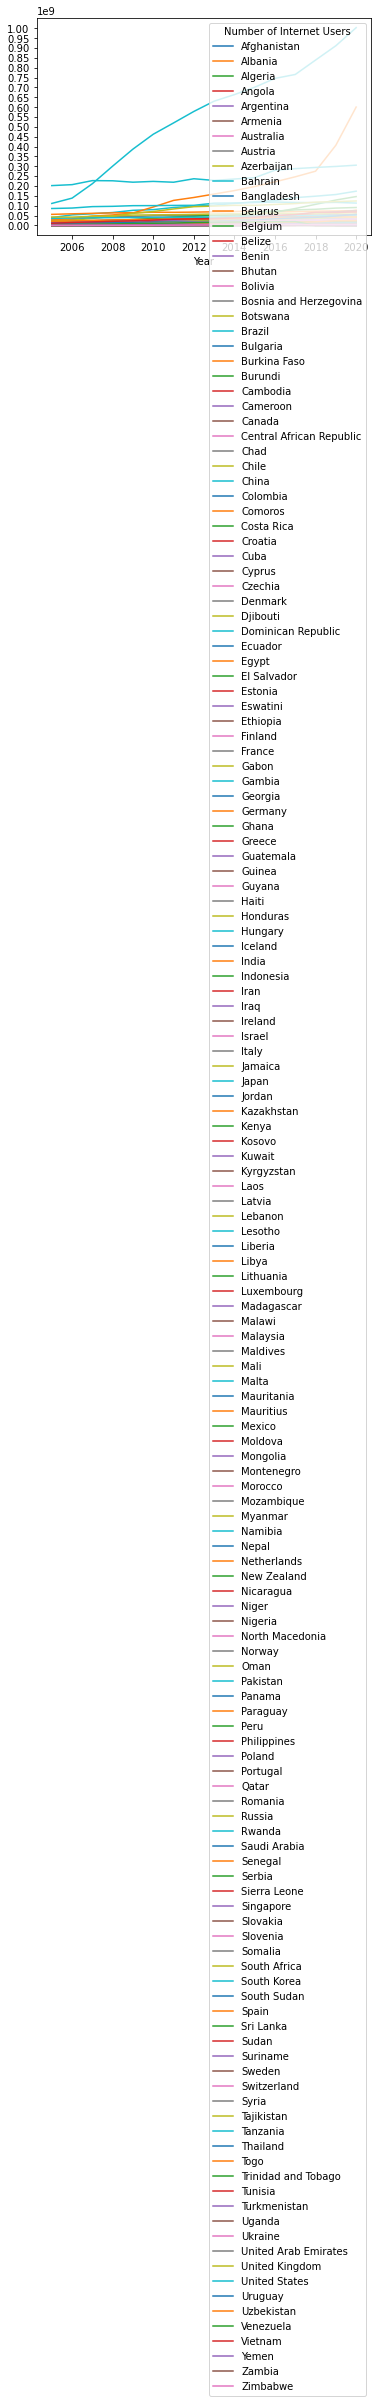

In [28]:
## Formatter is working, but on a blank plot above the one with data...
def format_number(val, indx):
    if val >= 1000000:
#         newval = '{:1.1f}M'.format(val*0.000001)
        newval = '%1.1fM' % (val*1e-6)
    else:
        newval = '{:1.0f}K'.format(val*0.001)
    return newval
formatter = FuncFormatter(format_number)

fig, ax = plt.subplots(figsize = (12, 7))

group_users_countries.plot()
plt.yticks(np.arange(0, 1003218651, 50000000))
ax.yaxis.set_major_formatter(formatter)
# plt.tight_layout()


In [29]:
# Let's look at the happiness data again - the full dataset first,
# rather than the subset where we dropped years and countries to align with
# the internet users data.
happydata.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [30]:
happycountries = happydata.groupby('Country Name')
ratings_by_country = happycountries['Confidence In National Government'].mean()
ratings_by_country.head(15)

Country Name
Afghanistan    0.382015
Albania        0.407852
Algeria             NaN
Angola         0.397389
Argentina      0.381224
Armenia        0.349403
Australia      0.498204
Austria        0.457858
Azerbaijan     0.763238
Bahrain             NaN
Bangladesh     0.764996
Belarus        0.510554
Belgium        0.435618
Belize         0.319865
Benin          0.637671
Name: Confidence In National Government, dtype: float64

In [31]:
# Uh oh! NaN NaN NaN NaN NaN NaN NaN BATMAN!
happydata_clean = happydata.dropna(how = 'any', axis = 0)
happydata_clean

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,Zimbabwe,Sub-Saharan Africa,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302


In [32]:
# Let's try that again...
happycountries = happydata_clean.groupby('Country Name')

#Let's get the mean for each aspect, across all years
ratings_by_country = happycountries.mean().round(2)

# We can drop the year column now.
ratings_by_country = ratings_by_country.drop('Year', axis = 1)
ratings_by_country.head(15)

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Country Name,,,,,,,,,,
Afghanistan,3.51,7.59,0.50,52.35,0.51,0.06,0.85,0.45,0.35,0.38
Albania,4.90,9.41,0.70,68.69,0.71,-0.05,0.88,0.56,0.30,0.41
Argentina,6.29,10.03,0.90,66.63,0.77,-0.15,0.84,0.74,0.29,0.38
Armenia,4.57,9.29,0.72,65.57,0.58,-0.20,0.84,0.50,0.44,0.35
Australia,7.27,10.76,0.94,70.54,0.92,0.27,0.42,0.74,0.21,0.50
Austria,7.23,10.88,0.92,70.37,0.90,0.13,0.57,0.72,0.18,0.46
Azerbaijan,4.94,9.51,0.77,62.29,0.66,-0.17,0.70,0.52,0.23,0.76
Bangladesh,4.76,8.28,0.61,62.30,0.75,-0.04,0.74,0.48,0.27,0.77
Belarus,5.60,9.76,0.91,63.73,0.67,-0.16,0.67,0.52,0.22,0.51


In [47]:
exp_data = happydata_clean.rename(columns={'Country Name': 'country'})

In [48]:
exp_data.head()

,country,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [49]:
exp_data.to_json(r'json/happydata.json', orient='records')

In [52]:
exp_data.to_csv(r'json/happydata.csv', index = False)

In [34]:
happiness = happydata.dropna(axis = 0, subset = ['Life Ladder'])
happiness_grouped = happiness.groupby('Country Name')
life_ladder = happiness_grouped['Life Ladder'].mean().round(2).sort_values(ascending = False)
life_ladder.head()

Country Name
Denmark        7.67
Finland        7.62
Norway         7.48
Switzerland    7.47
Iceland        7.46
Name: Life Ladder, dtype: float64

In [ ]:
# Export the happiness data!
ladder_countries = happiness.groupby(['Year', 'Country Name'])['Life Ladder'].mean().round(2)
ladder_countries = ladder_countries.unstack(level = 'Country Name')
ladder_countries.columns.name = 'Life Ladder'
ladder_countries
ladder_countries.to_json(r'json/happiness_by_country_yoy.json')